## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print results from each csv
print(f"Data Shape Mouse Meta Data: {mouse_metadata.shape}")
print(f"Data Shape Study Results: {study_results.shape}")


Data Shape Mouse Meta Data: (249, 5)
Data Shape Study Results: (1893, 4)


In [4]:
# Combine the data into a single dataset

new_df = pd.merge(mouse_metadata, study_results, how="outer", on='Mouse ID', )

# Display the data table for preview

new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [127]:
# Checking the number of mice.
mice_count = new_df['Mouse ID'].count()

mice_count

1893

In [130]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = new_df.loc[new_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()



In [131]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice


array(['g989'], dtype=object)

In [135]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

single_mouse = new_df[new_df['Mouse ID'].isin(duplicate_mice)==False]

single_mouse['Mouse ID'].count()

1880

In [136]:
# Checking the number of mice in the clean DataFrame.
count_mice = single_mouse.groupby('Mouse ID')

total_mice = len(count_mice)

total_mice

248

## Summary Statistics

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats_1 = single_mouse.groupby('Drug Regimen')
first_table = summary_stats_1.agg(['mean', 'median', 'var','std', 'sem'])['Tumor Volume (mm3)']
first_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
group_mean = single_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
group_median = single_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
group_var = single_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
group_std = single_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
group_sem = single_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


summary_stats = pd.DataFrame({'Mean': group_mean,
                             'Median': group_median,
                             'Variance': group_var,
                             'St Dev': group_std,
                             'SEM': group_sem})
summary_stats

,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

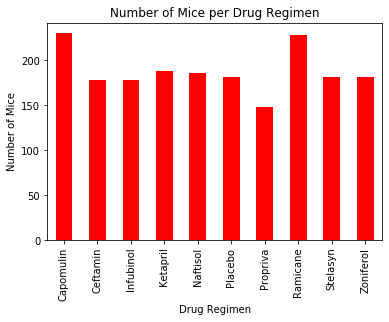

In [139]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#print the number of mice per treatment
mice_per_treatment

#plot using pandas 
mice_per_treatment.plot(kind='bar', color={'red'})

#label data
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')

#somehow the xaxis is already labeled?

Text(0.5, 0, 'Drug Regimen')

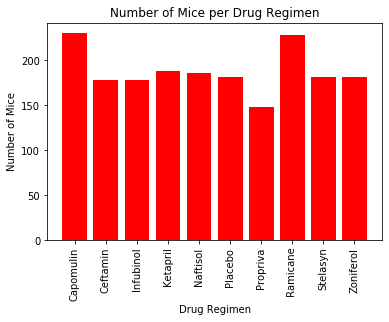

In [140]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#find the number of mice per drug regimen
mice_per_treatment = single_mouse.groupby(['Drug Regimen']).count()['Mouse ID']

#create an array 
users = mice_per_treatment
users

x_axis = np.arange(len(users))
x_axis

#plot the data to a bar graph
plt.bar(x=x_axis, height=users, color='r', alpha=1, align='center')

#label the bars
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',' Ramicane', 'Stelasyn', 'Zoniferol'], rotation=90)
plt.title('Number of Mice per Drug Regimen')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')

Text(0.5, 1.0, 'Gender Distribution of Mice')

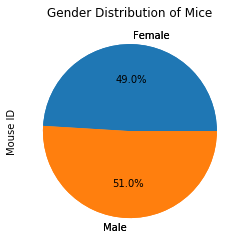

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender

labels = ['Female', 'Male']
counts = [922, 958]
# colors = ['pink', 'lightskyblue'] obviously this didn't work

#plot using pandas 
mice_per_gender.plot.pie(y='counts')

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Gender Distribution of Mice')



Text(0.5, 1.0, 'Gender Distribution of Mice')

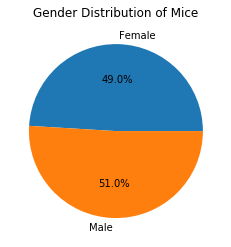

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#find the number of mice per gender
mice_per_gender = single_mouse.groupby(['Sex']).count()['Mouse ID']

mice_per_gender

labels = ['Female', 'Male']
counts = [922, 958]
colors = ['blue', 'orange'] 

#plot using pandas 
plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Gender Distribution of Mice')



## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# final_tumor_vol = single_mouse.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)']
# last_values = final_tumor_vol.last()

# Capomulin, Ramicane, Infubinol, and Ceftamin
# capomulin = single_mouse.loc[single_mouse['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Timepoint']]
# ramicane = single_mouse.loc[single_mouse['Drug Regimen'] == 'Ramicane',:]
# infubinol = single_mouse.loc[single_mouse['Drug Regimen'] == 'Infubinol',:]
# ceftamin = single_mouse.loc[single_mouse['Drug Regimen'] == 'Ceftamin',:]

# print(capomulin)
# print(ramicane)
# print(infubinol)
# print(ceftamin)

# Start by getting the last (greatest) timepoint for each mouse
# greatest_cap = capomulin.groupby('Mouse ID').max()['Timepoint']
# greatest_ram = ramicane.groupby('Mouse ID').max()['Timepoint']
# greatest_inf = infubinol.groupby('Mouse ID').max()['Timepoint']
# greatest_cef = ceftamin.groupby('Mouse ID').max()['Timepoint']

# #convert each to a data frame
# df_cap = pd.DataFrame(greatest_cap)
# df_cap
# df_ram = pd.DataFrame(greatest_ram)
# df_ram
# df_inf = pd.DataFrame(greatest_inf)
# df_cef = pd.DataFrame(greatest_cef)
# df_cef

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# cap_merge = pd.merge(new_df, df_cap, on=('Mouse ID', 'Timepoint'), how='right')
# cap_merge.head()

# ram_merge = pd.merge(new_df, df_ram, on=('Mouse ID', 'Timepoint'), how='right')
# ram_merge.head()

# inf_merge = pd.merge(new_df, df_inf, on=('Mouse ID', 'Timepoint'), how='right')
# inf_merge.head()

# cef_merge = pd.merge(new_df, df_cef, on=('Mouse ID', 'Timepoint'), how='right')
# cef_merge.head()

# #concat all dataframes together 
# total_merge = pd.concat([cap_merge, ram_merge, inf_merge, cef_merge])

# total_merge

#ATTEMPT NUMBER THREE (ugh)

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# something_new = single_mouse[single_mouse['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# something_new

capomulin = single_mouse['Drug Regimen'] == 'Capomulin'
capomulin_values = single_mouse[capomulin]
capomulin_values.head()

ramicane = single_mouse['Drug Regimen'] == 'Ramicane'
ramicane_values = single_mouse[ramicane]
ramicane_values.head()

infubinol = single_mouse['Drug Regimen'] == 'Infubinol'
infubinol_values = single_mouse[infubinol]
infubinol_values.head()

ceftamin = single_mouse['Drug Regimen'] == 'Ceftamin'
ceftamin_values = single_mouse[ceftamin]
ceftamin_values.head()

# Start by getting the last (greatest) timepoint for each mouse
cap_id = capomulin_values.groupby(['Mouse ID']).max()
cap_id.head()

ram_id = ramicane_values.groupby(['Mouse ID']).max()
ram_id.head()

inf_id = infubinol_values.groupby(['Mouse ID']).max()
inf_id.head()

cef_id = ceftamin_values.groupby(['Mouse ID']).max()
cef_id.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_DF = cap_id.loc[:,['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

ram_DF = ram_id.loc[:,['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

inf_DF = inf_id.loc[:,['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

cef_DF = cef_id.loc[:,['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

cap_DF.head()
ram_DF.head()
inf_DF.head()
cef_DF.head()

first_merge = pd.concat([cap_DF, ram_DF])
second_merge = pd.concat([first_merge, inf_DF])
final_merge = pd.concat([second_merge, cef_DF])
final_merge



,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
b128,Capomulin,45,45.651331
b742,Capomulin,45,45.000000
f966,Capomulin,20,45.000000
g288,Capomulin,45,46.304003
g316,Capomulin,45,46.809225
...,...,...,...
x226,Ceftamin,0,45.000000
x581,Ceftamin,45,64.634949
x822,Ceftamin,45,61.386660


In [150]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_cap = cap_DF[['Tumor Volume (mm3)']]
# numpy_cap = tumor_volume_cap.to_numpy()

tumor_volume_ram = ram_DF[['Tumor Volume (mm3)']]
# ram_numpy = tumor_volume_ram.to_numpy()

tumor_volume_inf = inf_DF[['Tumor Volume (mm3)']]
# inf_numpy = tumor_volume_inf.to_numpy()

tumor_volume_cef = cef_DF[['Tumor Volume (mm3)']]
# cef_numpy = tumor_volume_cef.to_numpy()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomullin
tumor_cap = cap_DF[['Tumor Volume (mm3)']]
cap_tum_vol = tumor_cap.reset_index()

cap_vol = cap_tum_vol['Tumor Volume (mm3)']
capquant = cap_vol.quantile([0.25, 0.5, 0.75])
capq1 = capquant[0.25]
capq3 = capquant[0.75]
cap_iqr = capq3-capq1

#Ramicane
tumor_ram = ram_DF[['Tumor Volume (mm3)']]
ram_tum_vol = tumor_ram.reset_index()

ram_vol = ram_tum_vol['Tumor Volume (mm3)']
ramquant = ram_vol.quantile([0.25, 0.5, 0.75])
ramq1 = ramquant[0.25]
ramq3 = ramquant[0.75]
ram_iqr = ramq3-ramq1

#Infubinol
tumor_inf = inf_DF[['Tumor Volume (mm3)']]
inf_tum_vol = tumor_inf.reset_index()

inf_vol = inf_tum_vol['Tumor Volume (mm3)']
infquant = inf_vol.quantile([0.25, 0.5, 0.75])
infq1 = infquant[0.25]
infq3 = infquant[0.75]
inf_iqr = infq3-infq1

# print(f"The lower quartile of tumor volume is: {capq1}")
# print(f"The upper quartile of tumor volume is: {capq3}")
# print(f"The interquartile range of tumor volume is: {cap_iqr}")
# print(f"The the median of tumor volume is: {capquant[0.5]} ")

# #calculate outliers
# cap_lower_b = capq1 - (1.5*cap_iqr)
# cap_upper_b = capq3 + (1.5*cap_iqr)

# print(f"Values below {cap_lower_b} could be outliers.")
# print(f"Values above {cap_upper_b} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
# outliers = cap_vol.loc[(cap_vol < cap_lower_b) | (cap_vol > cap_upper_b)]
# print(outliers)


Text(0, 0.5, 'Tumor Volume (mm3)')

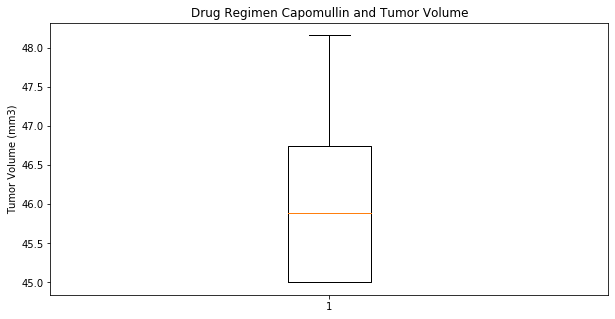

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(10,5))
plt.boxplot(cap_vol)
plt.title('Drug Regimen Capomullin and Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
